# Prelude
Picture this: you're grappling with some data point $x$, and you're itching to unveil its mysterious partner $y$. But let's be honest—you're not embarking on a quixotic quest to unearth the *original* distribution $P(x,y)$. No, that's a path for the brave or the bemused. You, my friend, are on a more pragmatic journey to simply predict $y$, given $x$.<br>$\hspace{2em}$
And if this $y$ you seek is a denizen of the binary realm—where it can only pledge allegiance to -1 or 1—you've just waltzed into the festive gala of discriminative binary classification methods. Amidst this revelry, there's a legend whispered with reverence—a model both stalwart and straightforward—the perceptron (the perceptron... the perceptron...). 
It's not just a mere algorithm; it's the heartthrob of linear classifiers, standing proudly at the core of the machine learning pantheon.

![perceptron-dalle](images/perceptron-dalle3.png)

# Perceptron
In this notebook, we will explore the perceptron, an algorithm as ancient as the queen herself; you all 
know it and probably had to code it for some class assignment.
Its popularity stems from its simplicity. It is a binary linear classification model, which means that for some input *x*, it will *classify* this input into one of *two* classes (binary)-in our example, we will use -1 and 1. <br> Why would you want to be able to classify anything into one of two classes? You most likely had that one classmate (if you did not, it is probably you) who, during the introductory statistics and probability class said, smirking with the smile of he-who-conquered-the-universe, that everything either is or is not; therefore, the probability of everything is 50%; given his statement (do not even try to dispute it buddy; you will only prompt him to more omniscient proclamations), virtually anything can be modeled as a binary classification, so there you go. Anything is quite a massive set of applications, no?

The algorithm:

1. Initialize parameters $w$ and $b$ to zeros
2. For $t$ = 1 to $\tau$ (number of iterations)
3. $\hspace{2em}$ For $i$ = 1 to $N$ (number of training points)
4. $\hspace{4em}$ if $y_i (w^T x_i + b) \leq 0$
5. $\hspace{6em}$ $w = w + \eta(y_i x_i)$
6. $\hspace{6em}$ $b = b + \eta(y_i)$

Where $\eta$ is a learning rate hyper-parameter, each point $x_i \in R^N$, $y_i \in \{-1,1\}$, $w \in R^N$ and $b \in R$ . We can stop training after no update has been done during one whole iteration.<br><br>

That is it, that is the algorithm.

... umm, why?
What does it mean?
Why does this update formula work?

In the rest of this notebook, we will atempt to answer some of those questions.
Let us first take a close look at the prediction:

## Prediction

$\hspace{2em} w^T x_i + b$

The expression first makes a dot product $w^T x_i$ and adds the bias term $b$, but what does it actually mean to take a dot product of two vectors?

#### Dot product
The dot product of two vectors $a = [a_1, a_2, ..., a_n]$ and $b = [b_1, b_2, ..., b_n]$ is defined as $a \cdot b = a^Tb = \sum_{i=1}^{n}a_i b_i$.
The geometric definition is a bit different: $a \cdot b = ||a|| \space ||b|| \cos{\theta}$.
(By dot product we mean the standard dot product, not any inner product)

One way of looking at a dot product is that we are decomposing the original vectors $a$ and $b$ into a linear combination of the canonical basis: 

$a = a_1  [1, 0, ..., 0] + a_2  [0, 1, ..., 0] + ... + a_n  [0, 0, ..., 1]$

$b = b_1  [1, 0, ..., 0] + b_2  [0, 1, ..., 0] + ... + b_n  [0, 0, ..., 1]$

and then summing the product of their respective "sub vectors". Let us look at a visual example:

![dotproduct](images/dotproduct.png) 

Okay, that is the process of computing the dot product, but what is the result? One interpretation is, that the result is a scalar representing "how much do these two vectors agree on their (weighted) direction". Here is what I mean by this mathematically flawed statement: 

For simplicity, let us assume that vectors $a$ and $b$ are of two dimensions. When we calculate their dot product, we compare their x-components by taking their product. If they share the same orientation, this product will be positive. If they share the same orientation and they are large, this product will be positive and large-we can say that they strongly agree on their direction. If these subcomponents differ in direction, the result of their product will be negative. If they differ in their direction and they are large, this product will be negative and large.<br> $\hspace{2em}$ If the resulting number of a dot product of two vectors is positive, it means that these two vectors "more agree on their direction than they disagree".

In our visual example, the x-components have the same orientation, so their product is going to be positive (2\*2=4), whereas their y-components are of opposite direction and so their product is goint to be negative (2\*-1=-2), but because the x-components *agree* more than their y-components *disagree*, the resulting dot product will be positive (4 + (-2) = 2).

If the two vectors $a$ and $b$ were perpendicular to each other, their dot product would be zero.

Let us bring this back to our perceptron example, in this case we have a vector $w$ and a bias $b$ (our parameters) and a vector $x_i$ (one point from our training set) and its respective label $y_i$. Let us ommit the bias term for now and focus only on the vectors and label.<br> $\hspace{2em}$ When we call dot product $w^T x_i$ we are asking: "Do these two vectors *agree* on their direction more than they *disagree*?" And if they do, their product is positive. If *y_i* is 1, the expression $y_i(w^T x_i)$ is positive. This for us means we have correctly classified $x_i$. And if $w^T x_i$ is negative, but $y_i$ is positive or if $w^T x_i$ is positive and $y_i$ is negative, the resulting expression $y_i(w^T x_i)$ is going to be negative-we have misclassified *x_i* (still keep ignoring the bias term $b$). 

So our goal so far can be described as *finding a vector $w$ such that it will point to the direction of all $x_i$ points whose $y_i = 1$, and away from the points $x_j$ for which $y_j = -1$*.

Hey, this is starting to make sense; let us look at an example of how perceptron training might end up and what is the resulting $w$ (the bias term is probably trying to escape out of your thought basement right now, so hit him a few times and lock him up).

![perceptron-result1](images/perceptron-result1.png)

Okay, so the vector $w$ indeed is pointing towards the positive examples (blue) and away from the negative ones (red) (note that this is not the only possible result we might get). But this representation makes it hard to find the *decision boundary*. What is that? It is the border between the two classes. On one side, you are +1; cross it, and you become -1.

How should we visualize such a boundary? Well, from what I told you just now, on one side, there are the positive labels, and on the other side, there are the negative labels, and precisely on the boundary, there are... neutral examples? ~~Hold on, this is not a binary classification! Someone call the poli~~ Haha, apologies for that guy. For points exactly on the boundary, we can say they belong to either one of the two classes. It really does not matter much.<br>
So, given this description, can you think of where the boundary should be?

That is right! It is represented by the vector whose dot product with the vector $w$ is zero. In other words, it is a line perpendicular to the vector $w$.

![decison-boundary](images/decision-boundary.png)

Great! We've grasped the result of the perceptron. Suddenly, you hear soft footsteps approaching. Turning around, you're faced with a menacing hooded figure approaching, a muffled laugh emanating from beneath his robes. "Foolish mortal, your model is laughably weak! Behold this simple case where your model fails," he taunts, presenting a picture in his decayed hands:

![decision-boundary-fail](images/decision-boundary-fail.png)

He is correct; there is no way to rotate the vector $w$ so that the decision boundary correctly splits the two point clusters... You've endured so much, unraveled ancient mysteries, only to fall short at the last hurdle.
But just as you are about to give in to the desperation, an inner strength breaks free. It's the bias term $b$, previously locked away within you! It surges forward with such might that it scatters the shadows, shouting, "Yes, we can!". With its help, we can easily shift the decision boundary so that it classifies our points correctly:

![decision-boundary-w-bias](images/decision-boundary-w-bias.png)

<br><br>
To conclude our understanding so far:
The vector $w$ is a normal vector to the decision boundary, and the perceptron algorithm aims to learn such $w$ that points at the positive samples ($y_i = 1$) and away from the negative examples. The bias $b$ is there to help us shift the decision boundary if needed. <br>(Note: Mind not the peasants who will mock this representation and implementation, saying that you can easily augment the points $x_i$ by appending 1 to their end, and then you only have one parameter vector w' = [w b]; they bring nothing new to the table and are only wasting oxygen)

We now have a firm understanding of the parameters, their visual representation, and a typical algorithm result. Let us take a closer look at the training process and why it works.

## Training

When you fully understand the interpretation of perceptron, the training process is quite straightforward:
We find a point that we misclassify with the current parameters $w$ and $b$, and we try to update the parameters in such a way that next time we classify it correctly (note that depending on the learning rate, we might misclassify the same point few times before we update the parameters enough to classify it correctly). <br>Let us take a look at an example:

Our dataset contains only three points: $X = [[-2, 2], [1, 1], [2, 2]]$ and $y=[-1, 1, 1]$. At the beginning, we initialize our parameters $w=[0, 0]$ and $b=0$. The followin picture depicts this initial configuration.

![perceptron-iter0](images/perceptron-iter0.png)

Suppose someone gave us the maximum number of iterations $\tau$, and our learning rate is $\eta = 1$. We start iterating over the data points:<br>
$y_1(w^T x_1 + b) = -1 (0 + 0) \le 0$, this means we have made an error, so we have to update our parameters:<br>
$w = w + \eta (y_1 x_1) = [0, 0] + 1(-1 \cdot [-2, 2]) = [2, -2]$<br>
$b = b + \eta y_1 = 0 + 1\cdot(-1) = -1$

And now our configuration looks like this:

![perceptron-iter1](images/perceptron-iter1.png)

Let's continue; we are still at the first iteration:<br>
$y_2(w^T x_2 + b) = 1 (2 \cdot 1 + (-2) \cdot 1 - 1) = -1 \le 0$ and that's yet another mistake, but we learn from it:<br>
$w = w + \eta (y_2 x_2) = [2, -2] + 1(1 \cdot [1, 1]) = [3, -1]$<br>
$b = b + \eta y_2 = -1 + 1\cdot(1) = 0$

Our next configuration:

![perceptron-iter1](images/perceptron-iter2.png)

Let's keep going in our final data point of the current iteration:<br>
$y_3(w^T x_3 + b) = 1 (3 \cdot 2 + (-1) \cdot 2 + 0) = 3 \gt 0$, correctly classified, no need to update parameters.<br>
Second iteration:
$y_1(w^T x_1 + b) = -1 (3 \cdot (-2) + (-1) \cdot 2 + 0) = 8 \gt 0$, correctly classified.<br>
$y_2(w^T x_2 + b) = 1 (3 \cdot 1 + (-1) \cdot 1 + 0) = 2 \gt 0$, correctly classified.<br>
$y_3(w^T x_3 + b) = 1 (3 \cdot 2 + (-1) \cdot 2 + 0) = 4 \gt 0$, also correctly classified.

We have correctly classified all our points, and we can end our algorithm. Why already? The update only happens when we misclassify an example, but if we correctly classify all examples, there will be no update for any future iteration.<br>
Isn't it beautiful? Look at it, bask in its glory. You deserve it. You have just implemented your very own perceptron.

Finally, let's ponder more about its properties.<br>As you have just seen, the first moment the algorithm finds a decision boundary that correctly splits the data, it stops. It will not continue to find an "even better" solution, whatever that might mean. Also the solution might differ on the ordering of the points. <br> Does the learning rate here matter? As long as it is positive and we use it for both the normal vector $w$ and the offset $b$, not really. Look at these two standard form equations of lines in 2D:
$ax + by + c = 0$ and $\frac{a}2 x + \frac{b}2 y + \frac{c}2 = 0$, they are, in fact, equal (we can multiply the second with 2).


Also, what about the $\tau$? How do we know how many iterations we might need?<br>
For that, we have the **Convergence Theorem**.


## Convergence Theorem

Before we delve into this theorem, we need to discuss what it means for a set to be linearly separable.

### Linear separability
We say a set $D_n$ is linearly separable if there exist parameters $w$ and $b$, such that for all $i = 1,2,...,n$ it holds $y_i (w^T x_i + b) \gt 0$. 
In other words, if the data set is linearly separable, there must exist a linear classifier that correctly classifies all of the points and makes no error.<br>
Now, for one data set, we might have multiple solutions, and even though all solutions are equal (from a perceptron's point of view), some solutions are more equal than others (from our point of view). Consider these two results:

![perceptron-margin](images/perceptron-margin.png)

Both solutions are valid and correctly split our data set. But intuitively, the one on the left looks "better" than the other. Why? It seems to us that it might generalize better to data we have not yet seen (it might also not, and the right one might be the "better" solution; that is the joy of machine learning and the inherent uncertainty in model selection and evaluation).
Let's put this intuition into clear mathematical jargon: The separator on the left has a higher margin of a dataset, as compared to the separator on the right.




### Margin of a dataset

First, we have to be able to calculate the distance of a point ($x$) from some hyperplane ($w, b$). We can achieve this by, well, buddy, you are so not going to believe me, using the dot product.

![orthogonal-projection](images/orthogonal-projection.png)

Picture this situation: We have a point $a$ and a line $b$ with a normal vector $c$, and we want to know the distance between the line and the point. Now, if we had a vector perpendicular to line $b$, starting at point $a$ and ending at some point on line $b$, then its length would be the distance between $a$ and $b$. Why does it have to be perpendicular? If it weren't, it wouldn't be the shortest path between $a$ and $b$. The shortest distance between a point and a line in Euclidean geometry is always along the perpendicular from the point to the line, as any other path forms a hypotenuse of a triangle, which is longer than its perpendicular side (I think some old bloke named Pythagoras said something about this).<br>$\hspace{2em}$ So we are looking for perpendicular vector (to line $b$) that starts at point $a$, alas; we don't have that. Buuut, we do, in fact, have a perpendicular vector to line $b$ - its normal vector $c$. Hmm, If only there were a way to *project* $a$ onto $c$ so that the resulting point (somewhere along the direction of vector $c$) would give us the answer to our distance question.<br>$\hspace{2em}$ 
If we represented the point $a$ as a position vector (vector that starts at the origin and has the same coordinates a $a$), it would have to hold that this vector $a = \alpha c + z$, where $\alpha$ is some scalar and $z$ is a vector perpendicular to $c$. Since they are perpendicular, their dot product must equal zero $c^T z = 0$, and we can rewrite vector $z$ as $z = a - \alpha c$. From there, we get $(a - \alpha c)^T c = 0$, and that is equal to $a^T c = \alpha c^T c$. And if we factor $\alpha$ out, we get $\alpha = \frac{a^T c}{c^T c}$. And now that we have $\alpha$, we can easily compute the projection of $a$ onto $c$ as $\alpha c = \frac{a^T c}{c^T c} \cdot c = \frac{a^T c}{c}$. And length of this vector is the distance between $a$ and $b$: $\frac{|a^T c|}{\lVert c \rVert}$.<br>$\hspace{2em}$
Alright! But in this case, we have silently assumed that the line passes through the origin, which it might not. In that case, it is described by a normal vector (let's start calling it $w$ again) *and* some offset $b$. Then, our distance formula would change to $\frac{|w^T a + b|}{\lVert w \rVert}$. One last addition to this: In our current solution, we have an absolute value in the numerator-that's because the dot product might be negative (remember, negative dot product indicates the two vectors "point more in the opposite direction, than in the same direction") and a distance can't be negative. That being said, under the assumption that we are dealing with labeled points ($x_i, y_i$) and we have found some linear separator that correctly separates the two classes, we can rewrite the formula once more: $y_i \frac{w^T x_i + b}{\lVert w \rVert}$.
This formula will not be negative as long as we correctly classify all points. This formula is also sometimes called the *margin of a labeled point* (with respect to some hyperplane).<br>$\hspace{2em}$
Finally, this brings us to the margin of a dataset: for some dataset $D_n$, its margin with respect to the hyperplane $w, b$ is defined as the *minimum margin of any point (from $D_n$) with respect to said $w, b$*:

$\underset{i}{\min} ( y_i \frac{w^T x_i + b}{\lVert w \rVert})$

(note that had we misclassified any point, the margin of the dataset would be negative)


Great, back to the convergence theorem.<br> If the data is linearly separable, the perceptron algorithm is guaranteed to find a correct linear separator. If the data is not linearly separable, the algorithm will not find a valid solution; neither will it realize the data is not linearly separable.

In [1]:
%pwd

'/Users/vojtechbartek/Documents/my-model-zoo/src/notebooks'

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import sys

# Add path to the parent directory to import modules
sys.path.append("../..")
from src.models.classification.perceptron import Perceptron

plt.style.use(
    "https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle"
)

In [35]:
X = np.array([[-2, 2], [1, 1], [2, 2]])
y = np.array([[-1], [1], [1]])

2
[ 3. -1.]
[0]


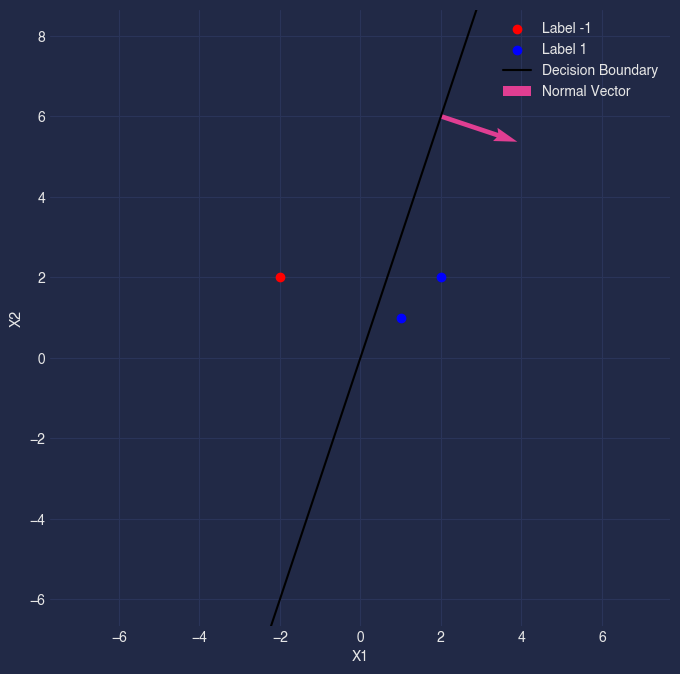

In [41]:
classifier = Perceptron(learning_rate=1)
classifier = classifier.fit(X, y, 20, visualize=True, frame_rate=0.3)
print(classifier.steps)
print(classifier.w)
print(classifier.b)